# Лабораторная работа №1

## Исследование разложения функции в ряд Тейлора

### Задание

Дана функция:

\[ f(x) = 2 \log_{10}(x) - (x-2)^2 \]

Требуется:

1. Найти аналитические выражения для производных функции
2. Реализовать разложение в ряд Тейлора второго порядка
3. Визуализировать результаты приближения

## Теоретическая часть

### Исходная функция

\[ f(x) = 2 \log_{10}(x) - (x-2)^2 \]

### Вычисление производных

**Первая производная:**

\[ f'(x) = \frac{d}{dx}\left[2 \log_{10}(x)\right] - \frac{d}{dx}\left[(x-2)^2\right] \]

\[ f'(x) = \frac{2}{x \ln(10)} - 2(x-2) \]

**Вторая производная:**

\[ f''(x) = \frac{d}{dx}\left[\frac{2}{x \ln(10)}\right] - \frac{d}{dx}\left[2(x-2)\right] \]

\[ f''(x) = -\frac{2}{x^2 \ln(10)} - 2 \]

### Разложение в ряд Тейлора

Ряд Тейлора второго порядка в точке \( x_0 \):

\[ f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{f''(x_0)(x - x_0)^2}{2!} \]

## Практическая реализация

In [91]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import sympy as sp

In [92]:
# Определение функции и её производных
def f(x: Union[np.ndarray, float]) -> Union[np.ndarray, float]:
    """
    Вычисляет значение функции f(x) = 2*log₁₀(x) - (x-2)².
    
    Parameters:
    x : значение или массив значений аргумента
    
    Returns:
    Значение функции в точке x
    """
    return 2 * np.log10(x) - np.power(x - 2, 2)

# Символьное вычисление производных с использованием SymPy
x = sp.symbols('x')
f_sym = 2 * sp.log(x, 10) - (x - 2)**2

# Первая производная
df_1_sym = sp.diff(f_sym, x)
df_1_func = sp.lambdify(x, df_1_sym, 'numpy')

# Вторая производная
df_2_sym = sp.diff(df_1_sym, x)
df_2_func = sp.lambdify(x, df_2_sym, 'numpy')

In [93]:
# Реализация разложения в ряд Тейлора
def f_taylor(x: Union[np.ndarray, float], x_0: float) -> Union[np.ndarray, float]:
    """
    Вычисляет приближение функции f(x) с использованием разложения
    в ряд Тейлора второго порядка в точке x₀.
    
    f(x) ≈ f(x₀) + f'(x₀)(x-x₀) + f''(x₀)(x-x₀)²/2!
    
    Parameters:
    x : значение или массив значений аргумента
    x_0 : точка разложения ряда Тейлора
    
    Returns:
    Приближенное значение функции в точке x
    """
    return f(x_0) + df_1_func(x_0) * (x - x_0) + (df_2_func(x_0) * np.power(x - x_0, 2)) / 2

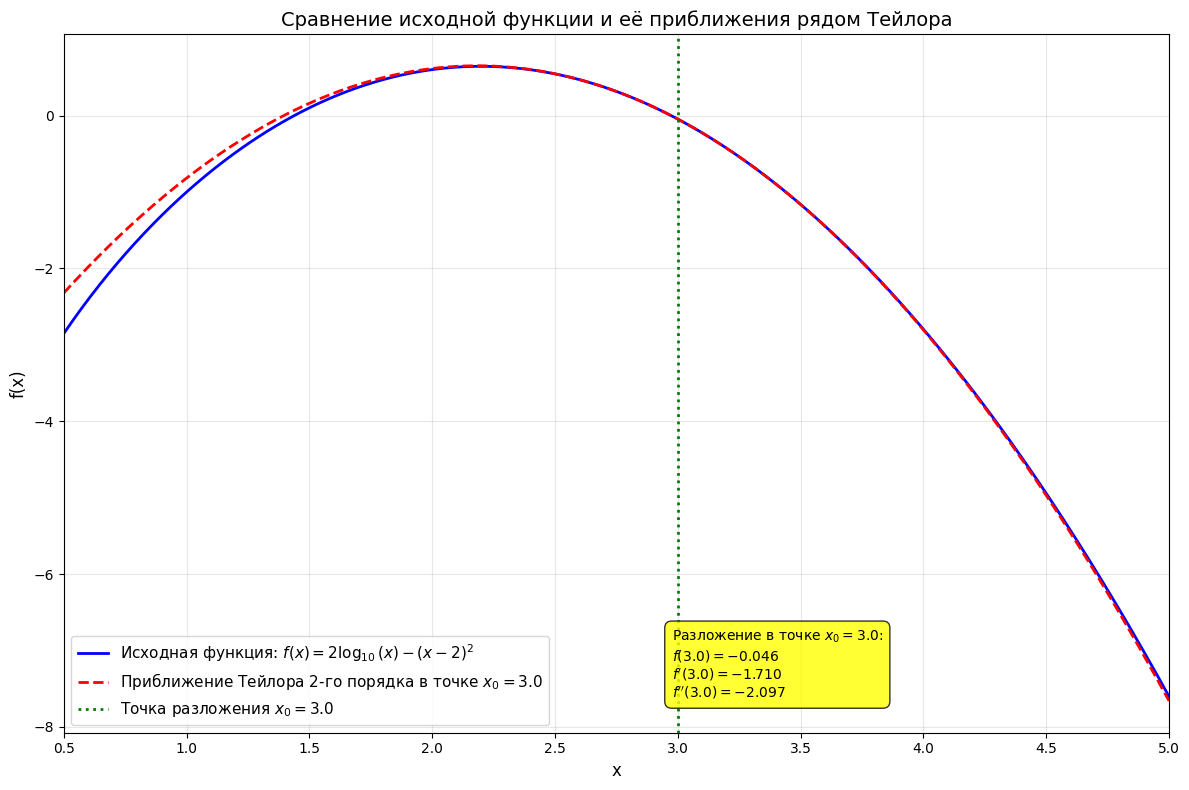

In [94]:
# Визуализация результатов

# Параметры исследования
x_0 = 3.0  # Точка разложения ряда Тейлора
x_min = 0.5  # Минимальное значение x (избегаем log(0))
x_max = 5.0  # Максимальное значение x
n_points = 500  # Количество точек для построения графиков

# Создание массива значений x
x_values = np.linspace(x_min, x_max, n_points)

# Вычисление значений исходной функции
y_original = f(x_values)

# Вычисление значений приближения Тейлора
y_taylor = f_taylor(x_values, x_0)

# Построение графиков
plt.figure(figsize=(12, 8))

# График исходной функции
plt.plot(x_values, y_original,
         label='Исходная функция: $f(x) = 2\\log_{10}(x) - (x-2)^2$',
         color='blue',
         linewidth=2)

# График приближения Тейлора
plt.plot(x_values, y_taylor,
         label=f'Приближение Тейлора 2-го порядка в точке $x_0 = {x_0}$',
         color='red',
         linestyle='--',
         linewidth=2)

# Вертикальная линия в точке разложения
plt.axvline(x=x_0,
            color='green',
            linestyle=':',
            linewidth=2,
            label=f'Точка разложения $x_0 = {x_0}$')

# Настройка графика
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Сравнение исходной функции и её приближения рядом Тейлора', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)

# Добавление текста с формулами
text_str = f'''Разложение в точке $x_0 = {x_0}$:
$f({x_0}) = {f(x_0):.3f}$
$f'({x_0}) = {df_1_func(x_0):.3f}$
$f''({x_0}) = {df_2_func(x_0):.3f}$'''

plt.text(0.55, 0.05, text_str,
         transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

In [95]:
x1, x2 = sp.symbols('x1 x2')
x_2d = 2*x1 - 7*x2
f_sym_2d = f_sym.subs(x, x_2d)

# Первая производная
df_x1_2d = sp.diff(f_sym_2d, x1)
df_x2_2d = sp.diff(f_sym_2d, x2)

df_1_func = sp.lambdify(x, df_1_sym, 'numpy')

# Вторые производные
df_x1_x1_2d = sp.diff(df_x1_2d, x1)
df_x1_x2_2d = sp.diff(df_x1_2d, x2)
df_x2_x2_2d = sp.diff(df_x2_2d, x2)


In [96]:
# Определение символьных переменных
x1, x2 = sp.symbols('x1 x2')

# Определение функции
f_sym = 2 * sp.log(x1, 10) - (x1 - 2)**2

# Создание переменной суммы символьных переменных
x_2d = 2*x1 - 7*x2

# Подстановка переменной суммы в функцию
f_sym_2d = f_sym.subs(x1, x_2d)
f_2d_np = sp.lambdify((x1, x2),f_sym_2d , 'numpy')

# Первая производная
df_x1_2d_symb = sp.diff(f_sym_2d, x1)
df_x2_2d_symb = sp.diff(f_sym_2d, x2)

# Вторые производные
df_x1_x1_2d_symb = sp.diff(df_x1_2d_symb, x1)
df_x1_x2_2d_symb = sp.diff(df_x1_2d_symb, x2)
df_x2_x2_2d_symb = sp.diff(df_x2_2d_symb, x2)

# Преобразование символьных выражений в функции для численных вычислений
df_x1_2d_func = sp.lambdify((x1, x2), df_x1_2d_symb, 'numpy')
df_x2_2d_func = sp.lambdify((x1, x2), df_x2_2d_symb, 'numpy')
df_x1_x1_2d_func = sp.lambdify((x1, x2), df_x1_x1_2d_symb, 'numpy')
df_x1_x2_2d_func = sp.lambdify((x1, x2), df_x1_x2_2d_symb, 'numpy')
df_x2_x2_2d_func = sp.lambdify((x1, x2), df_x2_x2_2d_symb, 'numpy')


In [97]:
a1_val = 12  # Числовое значение
a2_val = 3   # Числовое значение

# Вычисляем значения функции и производных в точке (a1_val, a2_val)
f_val = f_sym_2d.subs({x1: a1_val, x2: a2_val})
df_dx1_val = df_x1_2d_symb.subs({x1: a1_val, x2: a2_val})
df_dx2_val = df_x2_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx1_val = df_x1_x1_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx1x2_val = df_x1_x2_2d_symb.subs({x1: a1_val, x2: a2_val})
d2f_dx2_val = df_x2_x2_2d_symb.subs({x1: a1_val, x2: a2_val})

# Собираем ряд Тейлора 2-го порядка
# Здесь (x1 - a1_val) и (x2 - a2_val) - это уже символьные выражения
taylor_series_2d = (
    f_val +
    df_dx1_val * (x1 - a1_val) +
    df_dx2_val * (x2 - a2_val) +
    (1/2) * (
        d2f_dx1_val * (x1 - a1_val)**2 +
        2 * d2f_dx1x2_val * (x1 - a1_val)*(x2 - a2_val) +
        d2f_dx2_val * (x2 - a2_val)**2
    )
)

In [98]:
taylor_series_2d_np = sp.lambdify((x1, x2), taylor_series_2d, 'numpy')

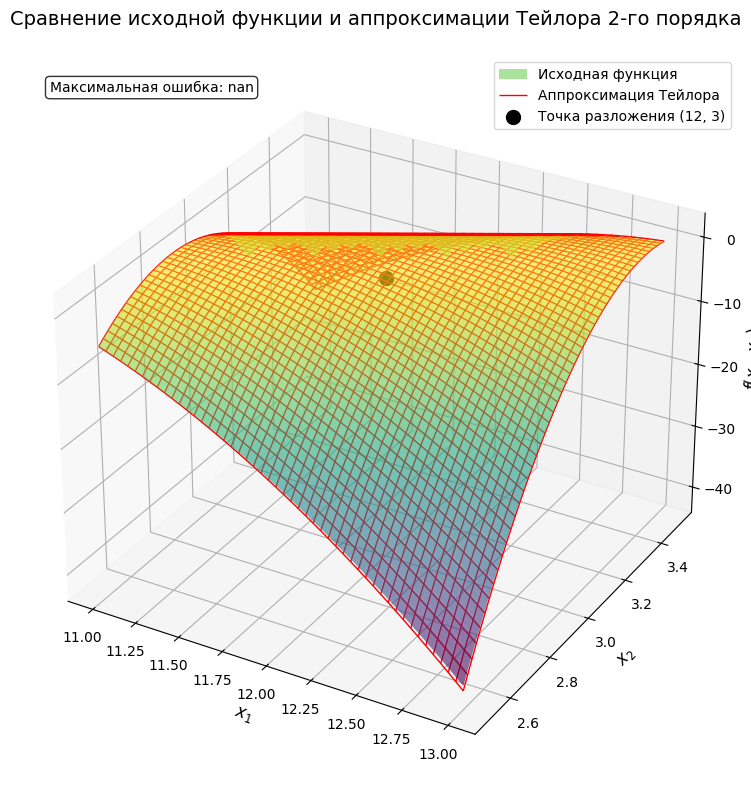

Анализ точности в окрестности точки (12, 3):
Диапазон x1: 11.0 - 13.0
Диапазон x2: 2.5 - 3.5
Максимальная ошибка: nan
Средняя ошибка: nan


In [101]:

# Создаем сетку вокруг точки (12, 3)
x1_range = np.linspace(11, 13, 50)  # ±1 вокруг 12
x2_range = np.linspace(2.5, 3.5, 50)  # ±0.5 вокруг 3
X1, X2 = np.meshgrid(x1_range, x2_range)

# Вычисляем значения функций
Z_original = f_2d_np(X1, X2)
Z_taylor = taylor_series_2d_np(X1, X2)

# Создаем график
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Отображаем исходную функцию (полупрозрачная)
surf1 = ax.plot_surface(X1, X2, Z_original, cmap='viridis', 
                       alpha=0.6, label='Исходная функция')

# Отображаем аппроксимацию Тейлора (сетка)
surf2 = ax.plot_wireframe(X1, X2, Z_taylor, color='red', 
                         linewidth=1, label='Аппроксимация Тейлора')

# Отмечаем точку разложения
ax.scatter(12, 3, f_2d_np(12, 3), color='black', s=100, 
          marker='o', label='Точка разложения (12, 3)')

# Настраиваем график
ax.set_title('Сравнение исходной функции и аппроксимации Тейлора 2-го порядка\n', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=12)
ax.set_ylabel('$x_2$', fontsize=12)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=12)

# Добавляем легенду
ax.legend()

# Добавляем информацию о ошибке
error = np.max(np.abs(Z_original - Z_taylor))
ax.text2D(0.05, 0.95, f'Максимальная ошибка: {error:.4f}', 
          transform=ax.transAxes, fontsize=10,
          bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Дополнительная информация
print("Анализ точности в окрестности точки (12, 3):")
print(f"Диапазон x1: {x1_range[0]:.1f} - {x1_range[-1]:.1f}")
print(f"Диапазон x2: {x2_range[0]:.1f} - {x2_range[-1]:.1f}")
print(f"Максимальная ошибка: {np.max(np.abs(Z_original - Z_taylor)):.6f}")
print(f"Средняя ошибка: {np.mean(np.abs(Z_original - Z_taylor)):.6f}")

In [100]:
Z_error

array([[           -inf, -1.16242377e+00, -6.70489381e-01, ...,
         1.81184587e+03,  1.81558927e+03,  1.81933654e+03],
       [            nan, -2.12879181e+00, -9.67980903e-01, ...,
         1.80922779e+03,  1.81296848e+03,  1.81671304e+03],
       [            nan,             nan, -1.56098796e+00, ...,
         1.80661160e+03,  1.81034959e+03,  1.81409144e+03],
       ...,
       [            nan,             nan,             nan, ...,
         1.42252123e+02,  1.43297986e+02,  1.44347707e+02],
       [            nan,             nan,             nan, ...,
         1.41522315e+02,  1.42565477e+02,  1.43612497e+02],
       [            nan,             nan,             nan, ...,
         1.40794398e+02,  1.41834859e+02,  1.42879178e+02]],
      shape=(1000, 1000))